#Resolutions for all Regions 6/6 Only

In [1]:
import sys
sys.path.append('/Users/demattia/Desktop/Notebooks')
import rootprint
import rootnotes
from array import array
# import LinearFitterHistograms

from ROOT import TFile, TH1F, TCanvas, TLegend, TGraphErrors
import math
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [33]:
f_name = "/linearFitterHistograms.root"

# base_dir = "/Users/demattia/RemoteProjects/Test/NewConstants/ConstantsProduction/"
base_dir = "/Users/demattia/RemoteProjects/LinearizedTrackFit/LinearizedTrackFit/python/ConstantsProduction/"

base_z = []
base_low_pt = []
base_high_pt = []
for region in range(1, 10):
    base_z.append(base_dir+"Combinations_Longitudinal_Rz_SecondOrder/Region_"+str(region)+"_")
    # Low pT
    base_low_pt.append(base_dir+"Combinations_Transverse_SecondOrder_2_10/Region_"+str(region)+"_")
    # base_low_pt.append(base_dir+"Combinations_Transverse_SecondOrder_2_15/Region_"+str(region)+"_")
    # base_low_pt.append(base_dir+"Combinations_Transverse_SecondOrder_2_15/Region_"+str(region)+"_")
    # High pT
    base_high_pt.append(base_dir+"Combinations_Transverse_SecondOrder_10_more/Region_"+str(region)+"_")
    # base_high_pt.append(base_dir+"Combinations_Transverse_SecondOrder_15_more/Region_"+str(region)+"_")
    # base_high_pt.append(base_dir+"Combinations_Transverse_SecondOrder_15_more/Region_"+str(region)+"_")

In [34]:
def fit(input_file_name, name):
    # print input_file_name
    input_file = TFile(input_file_name, "READ")
    h = input_file.FindObjectAny(name)
    h.Fit("gaus")
    fitResults = [0]*4
    try:
        fitResults[0] = h.GetFunction("gaus").GetParameter(1)
        fitResults[1] = h.GetFunction("gaus").GetParError(1)
        fitResults[2] = h.GetFunction("gaus").GetParameter(2)
        fitResults[3] = h.GetFunction("gaus").GetParError(2)
    except:
        pass
    h.SetName(input_file_name)
    return h, fitResults, input_file

In [35]:
def fitAndDraw(base_var, f_name, histo):
    h = fit(base_var+"All"+f_name, histo)
    fitResults = h[1]
    return h, fitResults

def fitAll(base_vars, f_name, histo):
    h = []
    fitResults = []
    for base_var in base_vars:
        h_temp, f_temp = fitAndDraw(base_var, f_name, histo)
        h.append(h_temp)
        fitResults.append(f_temp)
    return h, fitResults

In [36]:
def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()

        
def plot(fitResults, index, y_label, y_min = 0, y_max = 0):
    N = 9
    menMeans = [f[index] for f in fitResults]
    means = menMeans
    bottomMeans = [0]*N
    menStd =   [f[index+1] for f in fitResults]

    ind = np.linspace(0, 2*N, N)  # the x locations for the groups
    width = 1.5       # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, menMeans, width, bottom = bottomMeans, color='g', yerr=menStd)

    # add some text for labels, title and axes ticks
    ax.set_ylabel(y_label)
    # ax.set_title('pT relative bias')
    ax.set_xticks(ind+width/2)
    xticklabels = []
    for region in range(1, 10):
        xticklabels.append('Region '+str(region))
    ax.set_xticklabels( xticklabels )
    ax.grid()
    if (y_min != y_max):
        ax.set_ylim([y_min, y_max])

    autolabel(rects1)

    return plt

#Low pT

##pT Bias and Resolution

In [37]:
pt_histo = "EstimatedParRelError_summary_charge/pt"
h, fitResults = fitAll(base_low_pt, f_name, pt_histo)

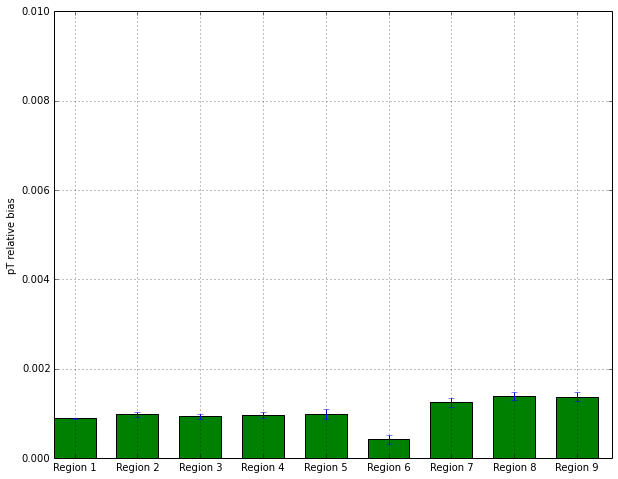

In [38]:
plt = plot(fitResults, 0, 'pT relative bias', y_max = 0.01)
plt.show()

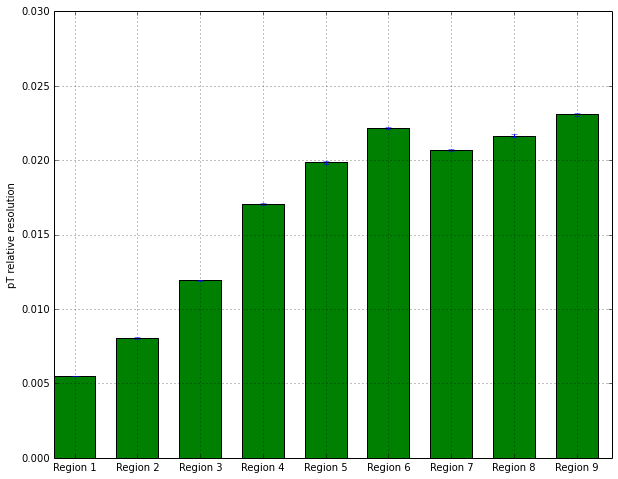

In [39]:
plt = plot(fitResults, 2, 'pT relative resolution', y_max = 0.03)
plt.show()

In [40]:
# plt = plot(fitResults, 0, 'pT relative resolution', single_mode = True, y_min = -0.02, y_max = 0.02)
# plt.show()

##Phi0 Bias and resolution

In [41]:
phi0_histo = "EstimatedParError_summary_phi"
h, fitResults = fitAll(base_low_pt, f_name, phi0_histo)

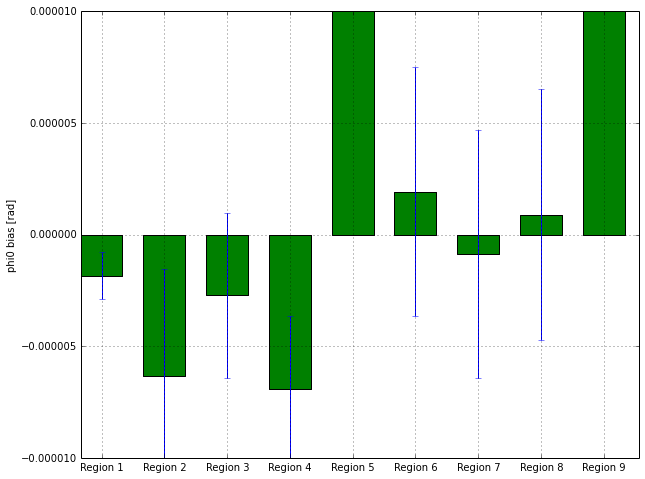

In [42]:
plt = plot(fitResults, 0, 'phi0 bias [rad]', y_min = -0.00001, y_max = 0.00001)
plt.show()

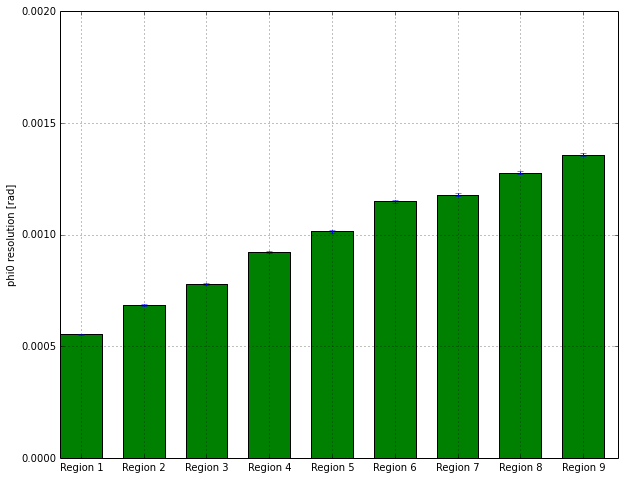

In [43]:
plt = plot(fitResults, 2, 'phi0 resolution [rad]', y_max = 0.002)
plt.show()

#High pT

In [44]:
pt_histo = "EstimatedParRelError_summary_charge/pt"
h, fitResults = fitAll(base_high_pt, f_name, pt_histo)

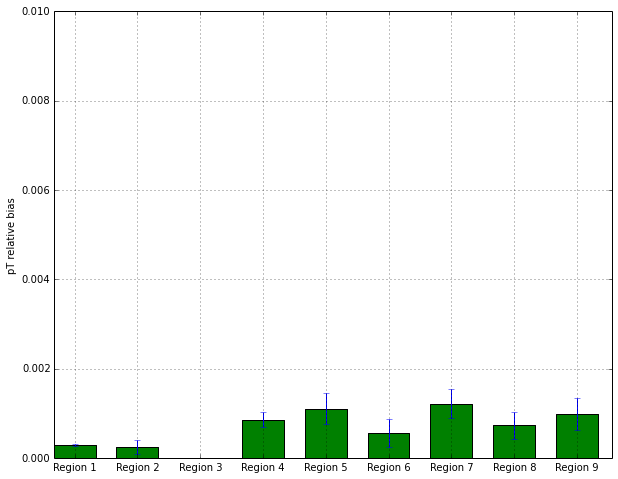

In [45]:
plt = plot(fitResults, 0, 'pT relative bias', y_max = 0.01)
plt.show()

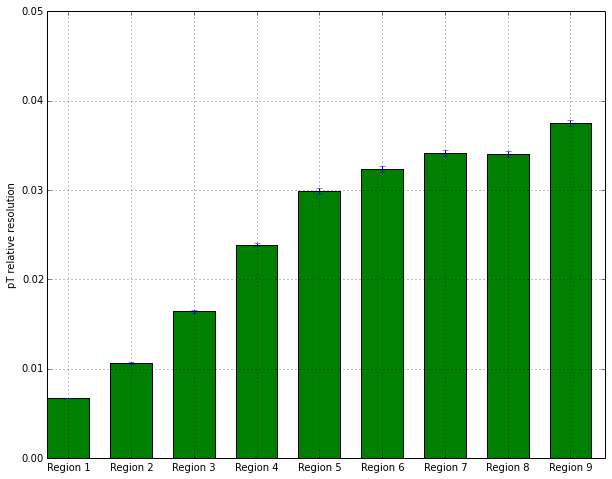

In [46]:
plt = plot(fitResults, 2, 'pT relative resolution', y_max = 0.05)
plt.show()

In [47]:
phi0_histo = "EstimatedParError_summary_phi"
h, fitResults = fitAll(base_high_pt, f_name, phi0_histo)

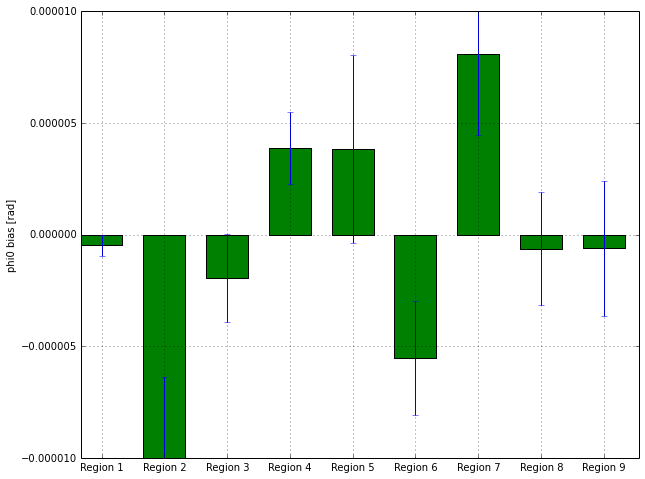

In [48]:
plt = plot(fitResults, 0, 'phi0 bias [rad]', y_min = -0.00001, y_max = 0.00001)
plt.show()

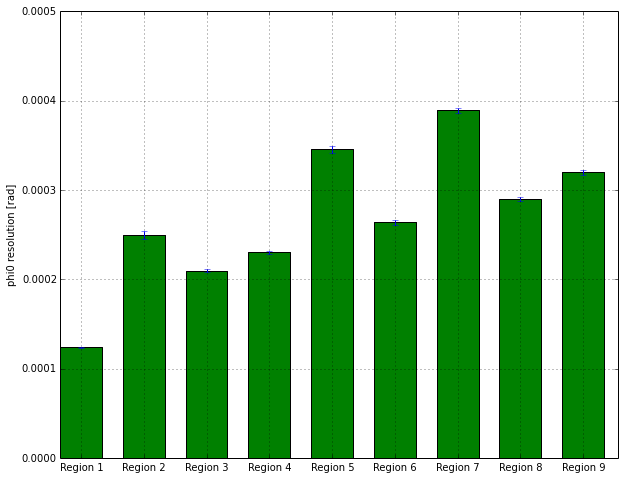

In [49]:
plt = plot(fitResults, 2, 'phi0 resolution [rad]', y_max = 0.0005)
plt.show()

## Z0 Bias and Resolution

In [27]:
z0_histo = "EstimatedParError_summary_z0"
h, fitResults = fitAll(base_z, f_name, z0_histo)

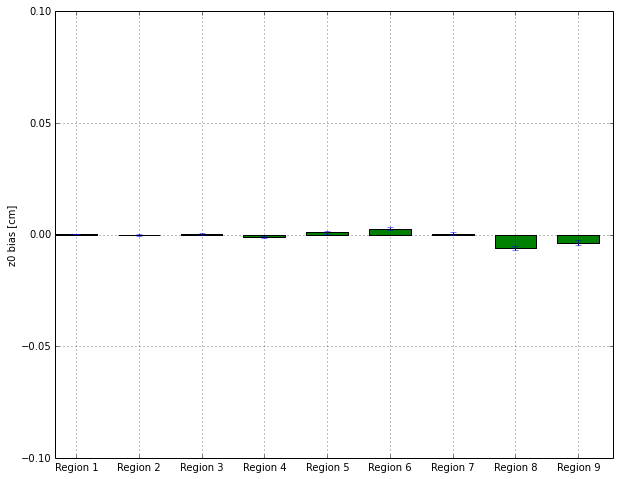

In [28]:
plt = plot(fitResults, 0, 'z0 bias [cm]', y_min = -0.1, y_max = 0.1)
plt.show()

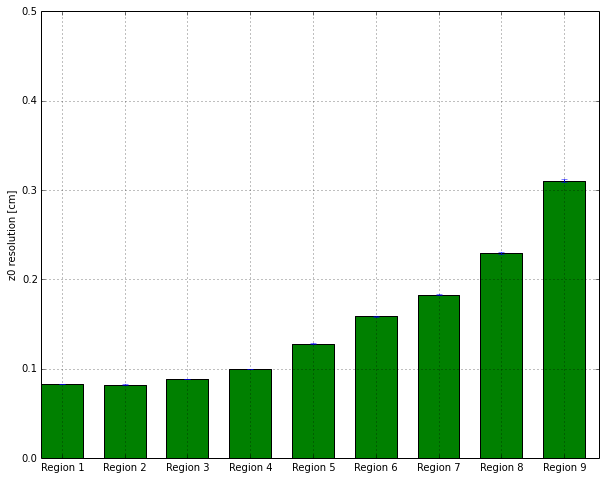

In [29]:
plt = plot(fitResults, 2, 'z0 resolution [cm]', y_max = 0.5)

##CotTheta Bias and Resolution

In [30]:
cotTheta_histo = "EstimatedParError_summary_cotTheta"
h, fitResults = fitAll(base_z, f_name, cotTheta_histo)

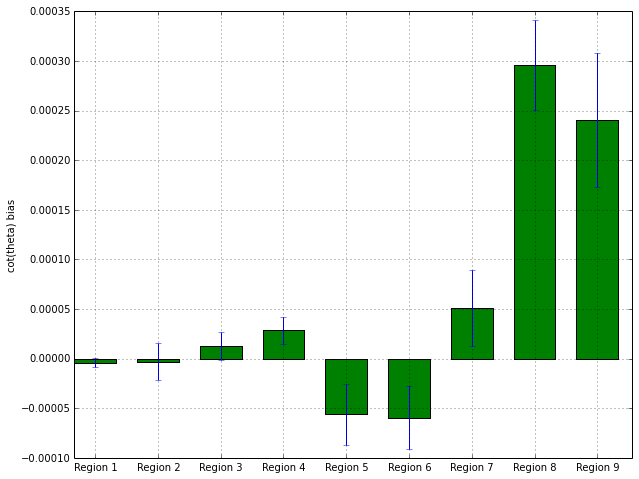

In [31]:
plt = plot(fitResults, 0, 'cot(theta) bias')
plt.show()

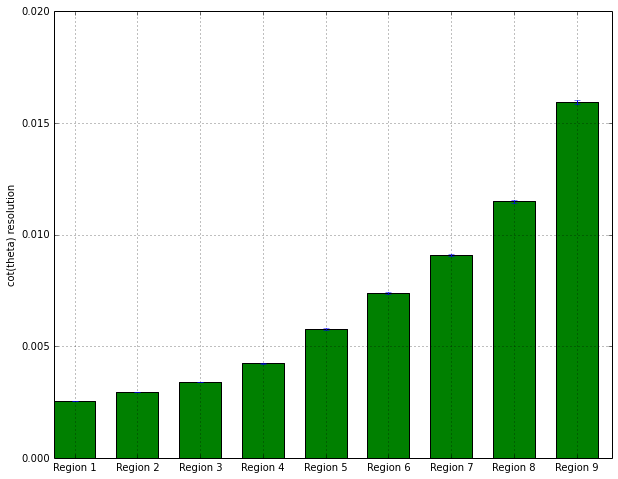

In [32]:
plt = plot(fitResults, 2, 'cot(theta) resolution', y_max = 0.02)
plt.show()